<a href="https://colab.research.google.com/github/FatemehRanjbar/Image_process/blob/main/Persian_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,186 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
!pip install pytesseract opencv-python pillow

In [4]:
# 1. Install the required libraries
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev
!pip install pytesseract opencv-python-headless pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.2 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB

In [5]:

# 2. Download the Farsi trained data and place it in the correct directory
!wget https://github.com/tesseract-ocr/tessdata/raw/main/fas.traineddata
!mv fas.traineddata /usr/share/tesseract-ocr/4.00/tessdata/


--2024-10-18 18:11:51--  https://github.com/tesseract-ocr/tessdata/raw/main/fas.traineddata
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/fas.traineddata [following]
--2024-10-18 18:11:51--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/fas.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561272 (548K) [application/octet-stream]
Saving to: ‘fas.traineddata’

fas.traineddata     100%[===================>] 548.12K  --.-KB/s    in 0.008s  

2024-10-18 18:11:51 (64.6 MB/s) - ‘fas.traineddata’ saved [561272/561272]



In [6]:
!sudo apt-get install tesseract-ocr-fas

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-fas
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 301 kB of archives.
After this operation, 446 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-fas all 1:4.00~git30-7274cfa-1.1 [301 kB]
Fetched 301 kB in 0s (2,493 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-fas.
(Reading databa

Saving sample_1.jpg to sample_1 (1).jpg
Best angle: 90


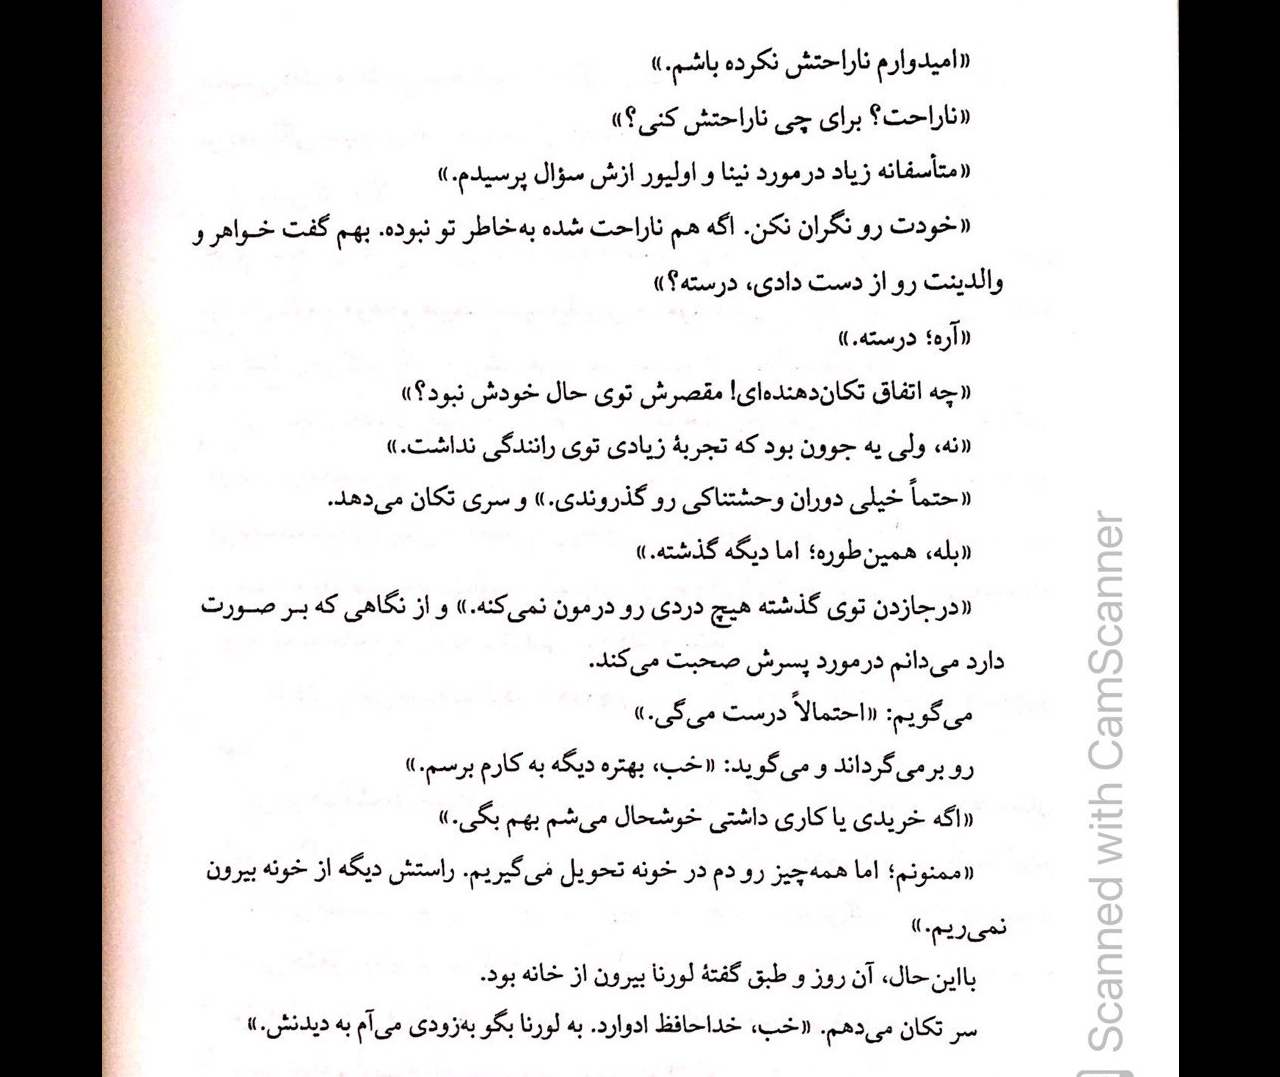

In [7]:
#for persian text


import cv2
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow
from google.colab import files


uploaded = files.upload()

# Get the uploaded file name
image_path = list(uploaded.keys())[0]


image = cv2.imread(image_path)

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def ocr_image(image, lang='fas'):
    custom_config = r'--oem 3 --psm 6 -l ' + lang
    details = pytesseract.image_to_data(image, output_type=Output.DICT, config=custom_config)
    return details

def get_orientation(image):
    angles = [0, 90, 180, 270]
    ocr_results = []

    for angle in angles:
        rotated = rotate_image(image, angle)
        details = ocr_image(rotated, lang='fas')
        num_chars = sum(len(word) for word in details['text'] if isinstance(word, str))
        ocr_results.append((angle, num_chars))

    best_angle = max(ocr_results, key=lambda x: x[1])[0]
    return best_angle

# Determine the correct orientation
correct_angle = get_orientation(image)

print(f"Best angle: {correct_angle}")

# Rotate the image to the correct angle
rotated_image = rotate_image(image, correct_angle)


cv2.imwrite('rotated_image.jpg', rotated_image)

cv2_imshow(rotated_image)
